In [87]:
# Get data from matlab files
import h5py 
f = h5py.File('smwc1_778.mat','r')

import numpy as np
# get Y data (target classes) into array format
Y = f.get('Y')
Y = np.array(Y)
Y = Y.T

from sklearn import preprocessing
# get X data (features) into array format
X = f.get('score')
X = np.array(X) # For converting to numpy array
X = X.T

# scale data
X_scaled = preprocessing.scale(X)

print('X is a %.3g row by %.3g col array' % (X_scaled.shape[0], X_scaled.shape[1]))
print('Y is a %.3g row by %.3g col array' % (Y.shape[0], Y.shape[1]))

X is a 778 row by 777 col array:
Y is a 778 row by 1 col array:


In [88]:
# Perform dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xhat = pca.fit_transform(X)

print("Xhat is a %.3g row by %.3g col array" % (Xhat.shape[0], Xhat.shape[1]))

Xhat is a 778 row by 2 col array


Testing the effect of perplexity (p) on t-SNE (D)...


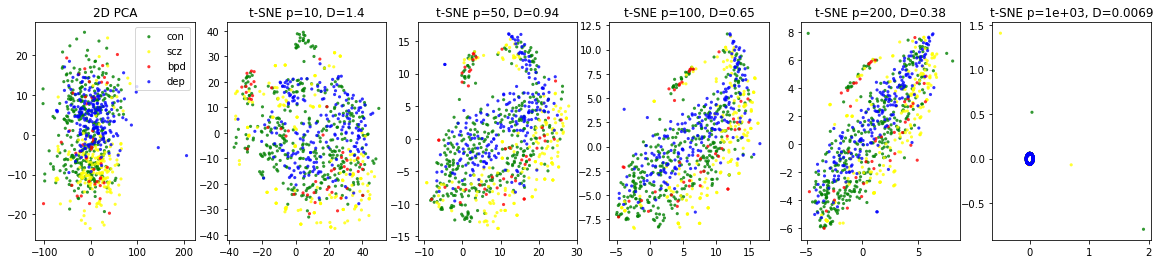

Conclusion: Success of t-SNE increases with perplexity


In [76]:
# Plot results
import matplotlib.pyplot as plt
from sklearn import manifold

print("Testing the effect of perplexity (p) on t-SNE (D)...")
perplexityness = [10,50,100,200,1000]
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(1,6, 1)

groups = ("con","scz","bpd","dep")
colors = ("green","yellow","red","blue")

# plotting PCA results
for group in groups:
    i = groups.index(group)
    groupIndex = np.where(Y == i)
    data = Xhat[groupIndex[0],:]
    x = data[:,0]
    y = data[:,1]
    ax.scatter(x, y, alpha = 0.8, c=colors[i], edgecolors='none', s=10, label=group)
plt.title('2D PCA')
plt.legend(loc=1)
plt.axis('tight')

# Plot tSNE over perplexity:
for p in perplexityness:
    i = perplexityness.index(p)
    
    # perform t-SNE 
    tsne = manifold.TSNE(n_components=2, random_state=0, perplexity=p)
    tSNE_X = tsne.fit_transform(X) # <-- X or X_scaled here
    
    # plot results
    ax = fig.add_subplot(1, 6, i+2)
    for group in groups:
        i = groups.index(group)
        groupIndex = np.where(Y == i)
        data = tSNE_X[groupIndex[0],:]
        x = data[:,0]
        y = data[:,1]
        ax.scatter(x, y, alpha = 0.8, c=colors[i], edgecolors='none', s=10, label=group)

    plt.title("t-SNE p=%.3g, D=%.2g" % (p, tsne.kl_divergence_))    
    plt.axis('tight')
    
plt.show()
print("Conclusion: Success of t-SNE increases with perplexity")

Testing the effect of starting seed (r) on t-SNE (D)...


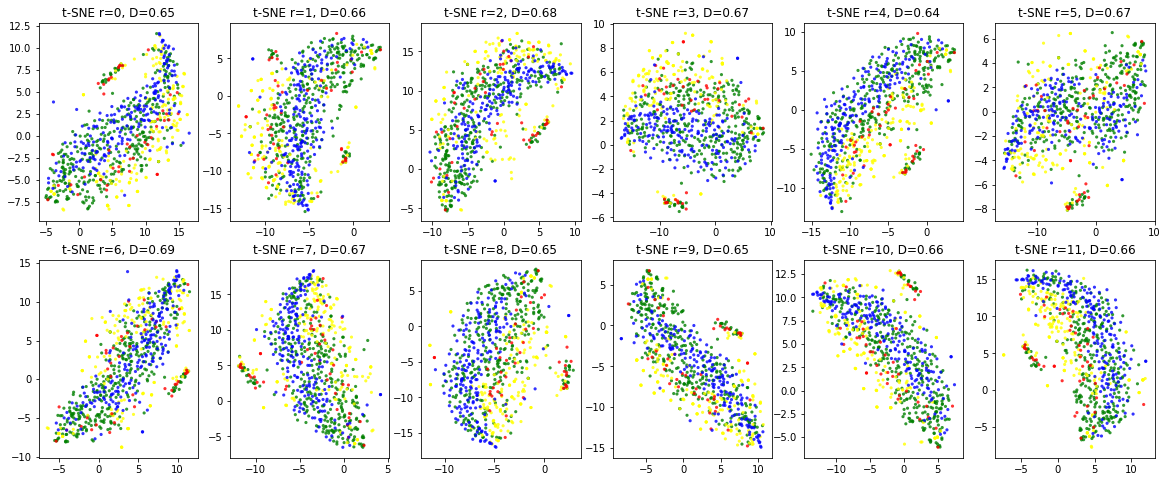

Conclusion: success of t-SNE varies with starting seed


In [78]:
# Plot tSNE over non-random starting points:
print("Testing the effect of starting seed (r) on t-SNE (D)...")

fig = plt.figure(figsize=(20, 8))
for i in range(12):
    # perform t-SNE 
    tsne = manifold.TSNE(n_components=2, perplexity=100, random_state=i)
    tSNE_X = tsne.fit_transform(X) # <-- X or X_scaled here
    
    # plot results
    ax = fig.add_subplot(2, 6, i+1)
    for group in groups:
        g = groups.index(group)
        groupIndex = np.where(Y == g)
        data = tSNE_X[groupIndex[0],:]
        x = data[:,0]
        y = data[:,1]
        ax.scatter(x, y, alpha = 0.8, c=colors[g], edgecolors='none', s=10, label=group)

    plt.title("t-SNE r=%.3g, D=%.2g" % (i, tsne.kl_divergence_))   
    plt.axis('tight')
   
plt.show()
print("Conclusion: success of t-SNE varies with starting seed")

Interaction between perplexity and starting seed...


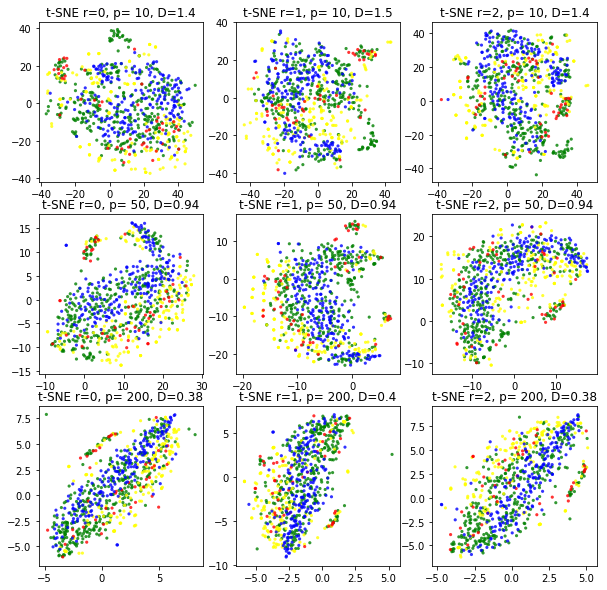

No interaction, but effect of perplexity greater than starting seed


In [85]:
print("Interaction between perplexity and starting seed...")
fig = plt.figure(figsize=(10, 10))
perplexityness = [10,50,200]
box = 1
for p in perplexityness:
    for i in range(3):
        # perform t-SNE 
        tsne = manifold.TSNE(n_components=2, perplexity=p, random_state=i)
        tSNE_X = tsne.fit_transform(X) # <-- X or X_scaled here
        ax = fig.add_subplot(3, 3, box)
        for group in groups:
            g = groups.index(group)
            groupIndex = np.where(Y == g)
            data = tSNE_X[groupIndex[0],:]
            x = data[:,0]
            y = data[:,1]
            ax.scatter(x, y, alpha = 0.8, c=colors[g], edgecolors='none', s=10, label=group)

        plt.title("t-SNE r=%.3g, p= %.3g, D=%.2g" % (i, p, tsne.kl_divergence_))   
        #plt.axis('tight')
        box = box + 1
   
plt.show()
print("No interaction, but effect of perplexity greater than starting seed")

Finding the best starting seed between 0 and 99...


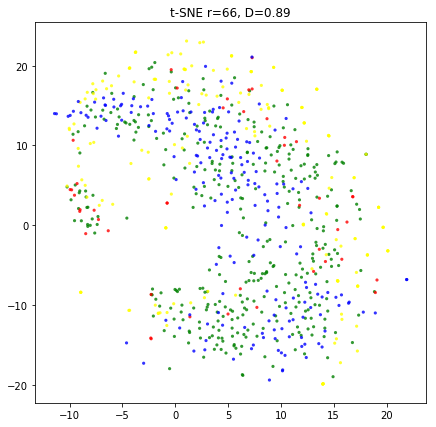

Conclusion: Best starting seed is 66


In [86]:
# find the best starting point
print("Finding the best starting seed between 0 and 99...")
D_best = 1
for i in range(100):
    # perform t-SNE 
    tsne = manifold.TSNE(n_components=2, perplexity=50, random_state=i)
    tSNE_X = tsne.fit(X)
    D = tsne.kl_divergence_
    delta = D - D_best
    if delta < 0:
        D_best = D
        i_best = i
        
# plot best results
tsne = manifold.TSNE(n_components=2, perplexity=50, random_state=i_best)
tSNE_X = tsne.fit_transform(X)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
for group in groups:
    g = groups.index(group)
    groupIndex = np.where(Y == g)
    data = tSNE_X[groupIndex[0],:]
    x = data[:,0]
    y = data[:,1]
    ax.scatter(x, y, alpha = 0.8, c=colors[g], edgecolors='none', s=10, label=group)

plt.title("t-SNE r=%.2g, D=%.2g" % (i_best, tsne.kl_divergence_))   
plt.axis('tight')
    
plt.show()
print("Conclusion: Best starting seed is %.2g" % i_best)

In [90]:
print("t-SNE reveals some latent structure within our dataset. After manifold learning, the data forms an arc-shaped archipelago. On this arc, the bulk of the SCZ (yellow) group occupies the outer edge while the DEP (blue) group occupies the inside edge. In between these groups lies the BPD (red) group, while the CON (green) group occupies mostly the same territory as the DEP and BPD groups, but is fairly well excluded from the SCZ territory. In this manner, we can almost see an ‘axis of psychosis’, perhaps a U-shaped axis, and I think this pattern roughly corresponds with our current state of knowledge about the brain differences between these three disorders.")

t-SNE reveals some latent structure within our dataset. After manifold learning, the data forms an arc-shaped archipelago. On this arc, the bulk of the SCZ (yellow) group occupies the outer edge while the DEP (blue) group occupies the inside edge. In between these groups lies the BPD (red) group, while the CON (green) group occupies mostly the same territory as the DEP and BPD groups, but is fairly well excluded from the SCZ territory. In this manner, we can almost see an ‘axis of psychosis’, perhaps a U-shaped axis, and I think this pattern roughly corresponds with our current state of knowledge about the brain differences between these three disorders.


In [81]:
perplexityness = [10,50,100]
box = 1
for p in perplexityness:
    for i in range(3):
        print(box,i, p)
        box = box + 1

1 0 10
2 1 10
3 2 10
4 0 50
5 1 50
6 2 50
7 0 100
8 1 100
9 2 100
